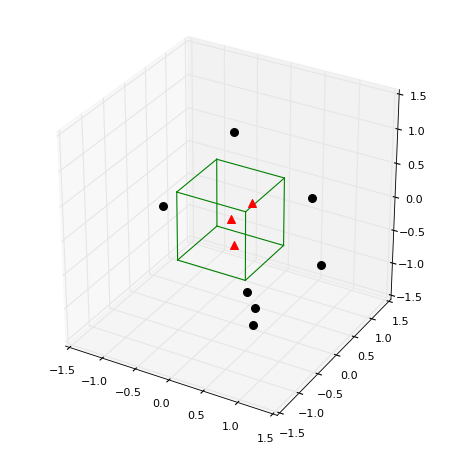

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# Plot Points

# samples within the cube
X_inside = np.array([[0,0,0],[0.2,0.2,0.2],[0.1, -0.1, -0.3]])

X_outside = np.array([[-1.2,0.3,-0.3],[0.8,-0.82,-0.9],[1, 0.6, -0.7],
                  [0.8,0.7,0.2],[0.7,-0.8,-0.45],[-0.3, 0.6, 0.9],
                  [0.7,-0.6,-0.8]])

for row in X_inside:
    ax.scatter(row[0], row[1], row[2], color="r", s=50, marker='^')

for row in X_outside:
    ax.scatter(row[0], row[1], row[2], color="k", s=50)

# Plot Cube
h = [-0.5, 0.5]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="g")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

plt.show()

In [2]:
def window_function(x_vec, unit_len=1.0):
    for row in x_vec:
        if np.abs(row) > (unit_len / 2):
            return 0
    return 1

In [3]:
X_all = np.vstack((X_inside,X_outside))
assert(X_all.shape == (10,3))

k_n = 0
for row in X_all:
    k_n += window_function(row.reshape(3,1))

print('Points inside the hypercube:', k_n)
print('Points outside the hybercube:', len(X_all) - k_n)

('Points inside the hypercube:', 3)
('Points outside the hybercube:', 7)


In [4]:
def parzen_window_est(x_samples, h=1.0, center=[0.,0.,0.]):
    dimensions = x_samples.shape[1]
    assert (len(center) == dimensions)
    k = 0
    for x in x_samples:
        is_inside = 1
        for axis, center_point in zip(x, center):
            if np.abs(axis - center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return float(k) / x_samples.shape[0] / (h**dimensions)

print ('p(x)=%f' % parzen_window_est(X_all))

p(x)=0.300000


In [5]:
mu_vec = np.array([0.,0.])
cov_mat = np.array([[1.,0.],[0.,1.]])
x_2Dgauss = np.random.multivariate_normal(mu_vec, cov_mat, 10000)
print x_2Dgauss.shape

(10000, 2)


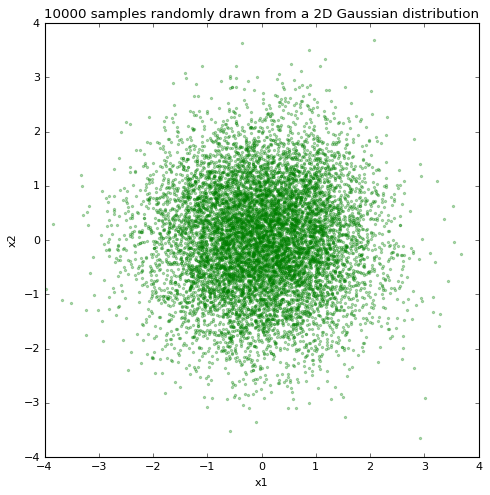

In [6]:
#from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_2Dgauss[:,0], x_2Dgauss[:,1],
        marker='o', color='green', s=4, alpha=0.3)
plt.title('10000 samples randomly drawn from a 2D Gaussian distribution')
plt.ylabel('x2')
plt.xlabel('x1')
plt.ylim([-4,4])
plt.xlim([-4,4])

plt.show()

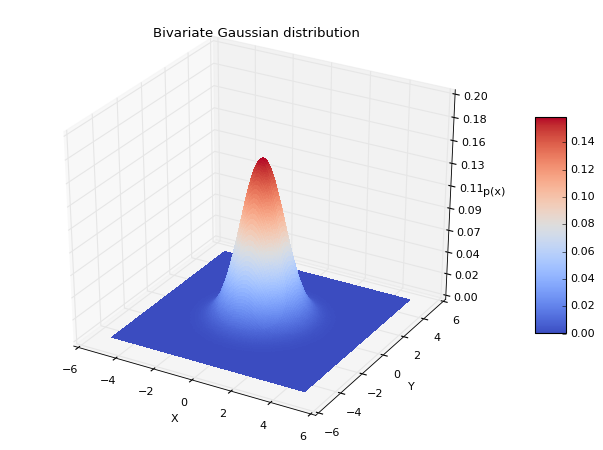

In [7]:
#import numpy as np
#from matplotlib import pyplot as plt

from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1,
        cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False
    )

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Gaussian distribution')
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

In [8]:
def pdf_multivariate_gauss(x, mu, cov):
    assert(mu.shape[0] > mu.shape[1]),\
        'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]),\
        'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]),\
        'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]),\
        'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]),\
        'mu and x must have the same dimensions'
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [9]:
from matplotlib.mlab import bivariate_normal

x = np.array([[0],[0]])
mu = np.array([[0],[0]])
cov = np.eye(2)

mlab_gauss = bivariate_normal(x,x)
mlab_gauss = float(mlab_gauss[0]) # because mlab returns an np.array
impl_gauss = pdf_multivariate_gauss(x, mu, cov)

print('mlab_gauss:', mlab_gauss)
print('impl_gauss:', impl_gauss)
assert(mlab_gauss == impl_gauss),\
        'Implementations of the mult. Gaussian return different pdfs'

('mlab_gauss:', 0.15915494309189535)
('impl_gauss:', 0.15915494309189535)


In [10]:
print 'Predict p(x) at the center [0,0]:'
print 'h = 0.1 ---> p(x)=', parzen_window_est(x_2Dgauss, h=0.1, center=[0.,0.])
print 'h = 0.3 ---> p(x)=', parzen_window_est(x_2Dgauss, h=0.3, center=[0.,0.])
print 'h = 0.6 ---> p(x)=', parzen_window_est(x_2Dgauss, h=0.6, center=[0.,0.])
print 'h = 1.0 ---> p(x)=', parzen_window_est(x_2Dgauss, center=[0.,0.])

Predict p(x) at the center [0,0]:
h = 0.1 ---> p(x)= 0.23
h = 0.3 ---> p(x)= 0.157777777778
h = 0.6 ---> p(x)= 0.148333333333
h = 1.0 ---> p(x)= 0.1433


In [11]:
h_range = np.linspace(0.001,1,1000)
mu = np.array([[0.], [0.]])
cov = np.eye(2)
actual_pdf_val = pdf_multivariate_gauss(np.array([[0.],[0.]]), mu, cov)

parzen_estimates = [np.absolute(parzen_window_est(x_2Dgauss, h=i, center=[0., 0.])
                   - actual_pdf_val) for i in h_range]
min_index = np.argsort(np.array(parzen_estimates))[0]
min_value = h_range[min_index]
print min_index, min_value, parzen_window_est(x_2Dgauss, h=min_value, center=[0., 0.])

287 0.288 0.159143518519


In [12]:
import prettytable

In [13]:
p1 = parzen_window_est(x_2Dgauss, h = min_value, center=[0.,0.])
p2 = parzen_window_est(x_2Dgauss, h = min_value, center=[0.5,0.5])
p3 = parzen_window_est(x_2Dgauss, h = min_value, center=[0.3,0.2])

mu = np.array([[0.], [0.]])
cov = np.eye(2)

a1 = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)
a2 = pdf_multivariate_gauss(np.array([[0.5],[0.5]]), mu, cov)
a3 = pdf_multivariate_gauss(np.array([[0.3],[0.2]]), mu, cov)

results = prettytable.PrettyTable(["", "predicted", "actual"])
results.add_row(["p([0,0]^t",p1, a1])
results.add_row(["p([0.5,0.5]^t",p2, a2])
results.add_row(["p([0.3,0.2]^t",p3, a3])

print results

+---------------+----------------+-----------------+
|               |   predicted    |      actual     |
+---------------+----------------+-----------------+
|   p([0,0]^t   | 0.159143518519 |  0.159154943092 |
| p([0.5,0.5]^t | 0.129002700617 | 0.0965323526301 |
| p([0.3,0.2]^t | 0.133825231481 |  0.139753228337 |
+---------------+----------------+-----------------+


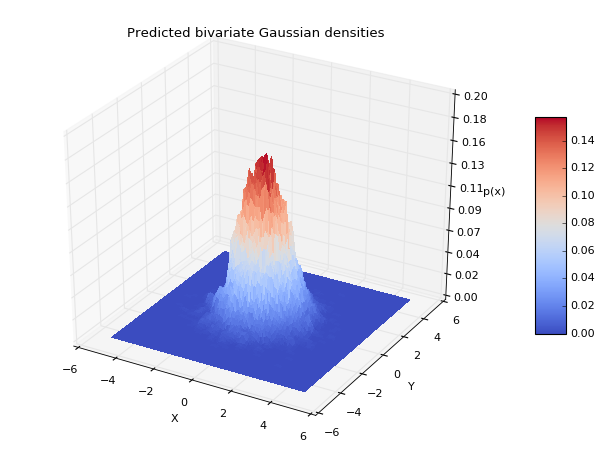

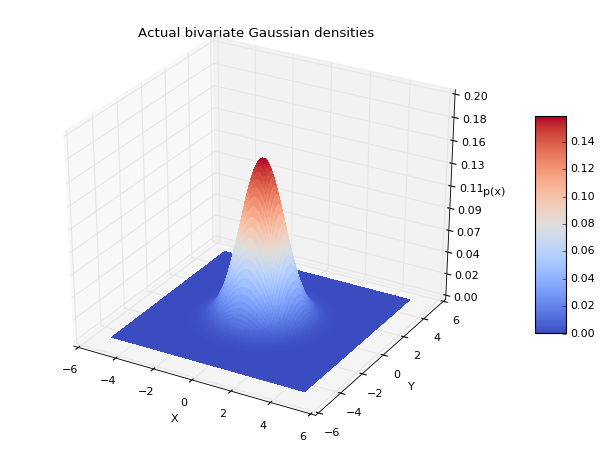

In [14]:
#import numpy as np
#from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##############################################
### Predicted bivariate Gaussian densities ###
##############################################

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)

Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(parzen_window_est(x_2Dgauss, h=h_range[min_index], center=[i, j]))

Z = np.asarray(Z).reshape(100,100)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Predicted bivariate Gaussian densities')

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

###########################################
### Actual bivariate Gaussian densities ###
###########################################

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 100)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
       linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Actual bivariate Gaussian densities')

plt.show()